In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yahooquery

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
# To check the current working directory
import os
os.getcwd()

'C:\\Users\\presj\\Data Analytics Project\\Stock_Market_Analysis'

In [7]:
# To change and check the current working directory
#os.chdir('/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project/')
#os.getcwd()

In [8]:
# Import our dependencies
import pandas as pd
import numpy as np
import csv
import re
import pandas_datareader.data as pdr
import datetime as dt
from sqlalchemy import create_engine
import psycopg2

#from config import db_password
import requests
import pickle
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
%matplotlib inline
import time
from collections import Counter

In [9]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [10]:
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import yfinance as yf
from collections import Counter


yf.pdr_override()

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2020, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        try:
            print(ticker)
            if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
                df = pdr.get_data_yahoo(ticker, start, end)
                df.reset_index(inplace=True)
                df.set_index("Date", inplace=True)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already have {}'.format(ticker))
        except KeyError:
            pass

save_sp500_tickers()
get_data_from_yahoo()

MMM
Already have MMM
AOS
Already have AOS
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADM
Already have ADM
ADBE
Already have ADBE
ADP
Already have ADP
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALGN
Already have ALGN
ALLE
Already have ALLE
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AMD
Already have AMD
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
AON
Already have AON
APA
Already have APA
AAPL
Already have AAPL
AMAT
Alrea

In [11]:
#import pandas as pd

In [12]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20


C:\Users\presj\AppData\Local\Temp/ipykernel_13604/86397400.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)


30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        AOS        ABT       ABBV        ABMD  \
Date                                                                  
2020-01-02  164.922287  45.638039  83.297440  78.725609  168.809998   
2020-01-03  163.502136  45.236778  82.281960  77.978355  166.820007   
2020-01-06  163.657898  45.523388  82.713066  78.593742  179.039993   
2020-01-07  162.998215  45.217670  82.253227  78.145378  180.350006   
2020-01-08  165.499542  45.150787  82.588516  78.699234  178.690002   

                   ACN       ATVI        ADM        ADBE         ADP  ...  \
Date                                                                  ...   
2020-01-02  202.450974  57.643391  43.117603  334.429993  161.599197  ...   
2020-01-03  202.113831  57.663044  43.033436  331.809998  161.257645  ...   
2020-01-0

In [13]:
#import matplotlib.pyplot as plt
#import numpy as np

           MMM       AOS       ABT      ABBV      ABMD       ACN      ATVI  \
MMM   1.000000  0.680450  0.611705  0.067890  0.657788  0.534336  0.530055   
AOS   0.680450  1.000000  0.926993  0.646516  0.781315  0.942930  0.313104   
ABT   0.611705  0.926993  1.000000  0.658646  0.862738  0.919507  0.427599   
ABBV  0.067890  0.646516  0.658646  1.000000  0.449869  0.744245  0.215047   
ABMD  0.657788  0.781315  0.862738  0.449869  1.000000  0.777257  0.588202   

           ADM      ADBE       ADP  ...       WTW       GWW      WYNN  \
MMM   0.173191  0.756871  0.410902  ...  0.703402  0.429293  0.651753   
AOS   0.682388  0.768555  0.846465  ...  0.795324  0.878009  0.154454   
ABT   0.695459  0.757077  0.788491  ...  0.751022  0.855900  0.077300   
ABBV  0.956080  0.213610  0.838810  ...  0.511216  0.883582 -0.250169   
ABMD  0.479784  0.829346  0.556153  ...  0.672273  0.672286  0.147460   

           XEL       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.139624 

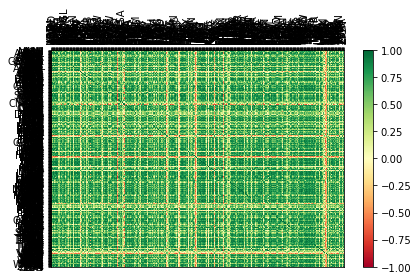

In [14]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()


In [15]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

In [16]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [17]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df


In [18]:
## Machine learning for "BUYING/ SELLING"
def do_ml(ticker):
    from sklearn.model_selection import train_test_split
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier, VotingClassifier
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', LinearSVC()),
                            ('knn', KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')



Data spread: Counter({'1': 332, '-1': 279, '0': 29})
accuracy: 0.56875
predicted class counts: Counter({1: 91, -1: 69})


Data spread: Counter({'1': 342, '-1': 246, '0': 52})
accuracy: 0.53125
predicted class counts: Counter({1: 136, -1: 24})


Data spread: Counter({'1': 281, '-1': 249, '0': 110})
accuracy: 0.4625
predicted class counts: Counter({-1: 80, 1: 76, 0: 4})




0.4625

In [19]:
#We can also run this against all tickers:

from statistics import mean

with open("sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)

    accuracy = do_ml(ticker)
    accuracies.append(accuracy)
    print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))

0
Data spread: Counter({'-1': 237, '1': 233, '0': 170})
accuracy: 0.375
predicted class counts: Counter({-1: 100, 1: 37, 0: 23})


MMM accuracy: 0.375. Average accuracy:0.375
Data spread: Counter({'1': 293, '-1': 286, '0': 61})
accuracy: 0.48125
predicted class counts: Counter({-1: 89, 1: 71})


AOS accuracy: 0.48125. Average accuracy:0.428125
Data spread: Counter({'1': 281, '-1': 249, '0': 110})
accuracy: 0.3625
predicted class counts: Counter({1: 83, -1: 77})


ABT accuracy: 0.3625. Average accuracy:0.40625
Data spread: Counter({'1': 292, '-1': 202, '0': 146})
accuracy: 0.4
predicted class counts: Counter({1: 104, -1: 46, 0: 10})


ABBV accuracy: 0.4. Average accuracy:0.4046875
Data spread: Counter({'1': 359, '-1': 251, '0': 30})
accuracy: 0.55625
predicted class counts: Counter({1: 110, -1: 50})


ABMD accuracy: 0.55625. Average accuracy:0.435
Data spread: Counter({'1': 291, '-1': 206, '0': 143})
accuracy: 0.40625
predicted class counts: Counter({1: 88, -1: 56, 0: 16})


ACN accurac

accuracy: 0.5375
predicted class counts: Counter({1: 94, -1: 66})


AMAT accuracy: 0.5375. Average accuracy:0.4565159574468085
Data spread: Counter({'1': 327, '-1': 294, '0': 19})
accuracy: 0.49375
predicted class counts: Counter({1: 111, -1: 49})


APTV accuracy: 0.49375. Average accuracy:0.45729166666666665
Data spread: Counter({'1': 323, '-1': 256, '0': 61})
accuracy: 0.5375
predicted class counts: Counter({1: 108, -1: 52})


ANET accuracy: 0.5375. Average accuracy:0.4589285714285714
Data spread: Counter({'1': 319, '-1': 191, '0': 130})
accuracy: 0.43125
predicted class counts: Counter({1: 125, -1: 27, 0: 8})


AJG accuracy: 0.43125. Average accuracy:0.458375
50
Data spread: Counter({'1': 311, '-1': 217, '0': 112})
accuracy: 0.43125
predicted class counts: Counter({1: 127, -1: 29, 0: 4})


AIZ accuracy: 0.43125. Average accuracy:0.45784313725490194
Data spread: Counter({'-1': 225, '1': 223, '0': 192})
accuracy: 0.34375
predicted class counts: Counter({0: 70, -1: 47, 1: 43})


T accu

accuracy: 0.48125
predicted class counts: Counter({1: 110, -1: 50})


CTLT accuracy: 0.48125. Average accuracy:0.45688875786163524
Data spread: Counter({'1': 311, '-1': 260, '0': 69})
accuracy: 0.45625
predicted class counts: Counter({1: 86, -1: 74})


CAT accuracy: 0.45625. Average accuracy:0.4568818894975316
Data spread: Counter({'1': 293, '-1': 282, '0': 65})
accuracy: 0.475
predicted class counts: Counter({-1: 84, 1: 76})


CBOE accuracy: 0.475. Average accuracy:0.4570746353539409
Data spread: Counter({'1': 309, '-1': 272, '0': 59})
accuracy: 0.48125
predicted class counts: Counter({1: 106, -1: 54})


CBRE accuracy: 0.48125. Average accuracy:0.45732911287653094
Data spread: Counter({'1': 312, '-1': 269, '0': 59})
accuracy: 0.41875
predicted class counts: Counter({1: 83, -1: 77})


CDW accuracy: 0.41875. Average accuracy:0.4569272471174004
Data spread: Counter({'1': 310, '-1': 274, '0': 56})
accuracy: 0.4625
predicted class counts: Counter({1: 96, -1: 64})


CE accuracy: 0.4625. Ave

accuracy: 0.40625
predicted class counts: Counter({-1: 109, 1: 50, 0: 1})


CMI accuracy: 0.40625. Average accuracy:0.45343214892347244
Data spread: Counter({'1': 283, '-1': 260, '0': 97})
accuracy: 0.35625
predicted class counts: Counter({1: 99, -1: 61})


CVS accuracy: 0.35625. Average accuracy:0.45272793045301246
Data spread: Counter({'1': 357, '-1': 258, '0': 25})
accuracy: 0.5625
predicted class counts: Counter({1: 128, -1: 32})


DHI accuracy: 0.5625. Average accuracy:0.4535176575720556
Data spread: Counter({'1': 342, '-1': 215, '0': 83})
accuracy: 0.51875
predicted class counts: Counter({1: 137, -1: 23})


DHR accuracy: 0.51875. Average accuracy:0.4539836028751123
140
Data spread: Counter({'-1': 300, '1': 288, '0': 52})
accuracy: 0.4625
predicted class counts: Counter({-1: 106, 1: 54})


DRI accuracy: 0.4625. Average accuracy:0.45404400285472146
Data spread: Counter({'1': 306, '-1': 253, '0': 81})
accuracy: 0.45625
predicted class counts: Counter({1: 103, -1: 57})


DVA accuracy

accuracy: 0.44375
predicted class counts: Counter({1: 111, -1: 49})


EL accuracy: 0.44375. Average accuracy:0.45261788133250397
Data spread: Counter({'1': 354, '-1': 279, '0': 7})
accuracy: 0.51875
predicted class counts: Counter({1: 118, -1: 42})


ETSY accuracy: 0.51875. Average accuracy:0.4529792590301406
Data spread: Counter({'1': 294, '-1': 278, '0': 68})
accuracy: 0.4125
predicted class counts: Counter({1: 93, -1: 67})


RE accuracy: 0.4125. Average accuracy:0.4527592630571507
Data spread: Counter({'1': 297, '-1': 213, '0': 130})
accuracy: 0.525
predicted class counts: Counter({1: 129, -1: 29, 0: 2})


EVRG accuracy: 0.525. Average accuracy:0.453149753527112
Data spread: Counter({'1': 264, '-1': 263, '0': 113})
accuracy: 0.39375
predicted class counts: Counter({1: 85, -1: 75})


ES accuracy: 0.39375. Average accuracy:0.45283040001352537
Data spread: Counter({'1': 296, '-1': 219, '0': 125})
accuracy: 0.46875
predicted class counts: Counter({1: 100, -1: 54, 0: 6})


EXC accuracy: 

accuracy: 0.44375
predicted class counts: Counter({1: 103, -1: 57})


HCA accuracy: 0.44375. Average accuracy:0.4539986978084393
Data spread: Counter({'1': 301, '-1': 258, '0': 81})
accuracy: 0.45
predicted class counts: Counter({1: 111, -1: 49})


PEAK accuracy: 0.45. Average accuracy:0.4539811596601567
Data spread: Counter({'1': 301, '-1': 264, '0': 75})
accuracy: 0.46875
predicted class counts: Counter({1: 105, -1: 55})


HSIC accuracy: 0.46875. Average accuracy:0.4540456524127324
Data spread: Counter({'1': 254, '0': 198, '-1': 188})
accuracy: 0.3125
predicted class counts: Counter({1: 82, -1: 43, 0: 35})


HSY accuracy: 0.3125. Average accuracy:0.45343023653267706
230
Data spread: Counter({'1': 325, '-1': 302, '0': 13})
accuracy: 0.55
predicted class counts: Counter({1: 110, -1: 50})


HES accuracy: 0.55. Average accuracy:0.453848287456778
Data spread: Counter({'1': 310, '-1': 279, '0': 51})
accuracy: 0.525
predicted class counts: Counter({1: 88, -1: 72})


HPE accuracy: 0.525. Ave

accuracy: 0.34375
predicted class counts: Counter({0: 69, 1: 52, -1: 39})


KMB accuracy: 0.34375. Average accuracy:0.453934575009249
Data spread: Counter({'1': 321, '-1': 287, '0': 32})
accuracy: 0.46875
predicted class counts: Counter({1: 125, -1: 35})


KIM accuracy: 0.46875. Average accuracy:0.45398884396525907
Data spread: Counter({'1': 286, '-1': 269, '0': 85})
accuracy: 0.48125
predicted class counts: Counter({-1: 81, 1: 79})


KMI accuracy: 0.48125. Average accuracy:0.4540883372354588
Data spread: Counter({'1': 341, '-1': 288, '0': 11})
accuracy: 0.51875
predicted class counts: Counter({1: 110, -1: 50})


KLAC accuracy: 0.51875. Average accuracy:0.45432347055460265
Data spread: Counter({'1': 279, '-1': 244, '0': 117})
accuracy: 0.41875
predicted class counts: Counter({-1: 94, 1: 66})


KHC accuracy: 0.41875. Average accuracy:0.4541945811685352
Data spread: Counter({'1': 308, '-1': 249, '0': 83})
accuracy: 0.41875
predicted class counts: Counter({1: 108, -1: 52})


KR accuracy: 

accuracy: 0.525
predicted class counts: Counter({1: 91, -1: 69})


MRNA accuracy: 0.525. Average accuracy:0.45426326309941867
Data spread: Counter({'1': 318, '-1': 295, '0': 27})
accuracy: 0.4625
predicted class counts: Counter({1: 81, -1: 79})


MHK accuracy: 0.4625. Average accuracy:0.4542891647877853
Data spread: Counter({'1': 330, '-1': 271, '0': 39})
accuracy: 0.475
predicted class counts: Counter({1: 106, -1: 54})


MOH accuracy: 0.475. Average accuracy:0.4543540890360995
Data spread: Counter({'1': 304, '-1': 301, '0': 35})
accuracy: 0.36875
predicted class counts: Counter({-1: 85, 1: 75})


TAP accuracy: 0.36875. Average accuracy:0.45408657625786164
320
Data spread: Counter({'1': 243, '-1': 204, '0': 193})
accuracy: 0.3
predicted class counts: Counter({0: 71, -1: 49, 1: 40})


MDLZ accuracy: 0.3. Average accuracy:0.453606555771077
Data spread: Counter({'1': 345, '-1': 268, '0': 27})
accuracy: 0.53125
predicted class counts: Counter({1: 117, -1: 43})


MPWR accuracy: 0.53125. Ave

accuracy: 0.5
predicted class counts: Counter({-1: 105, 1: 55})


PARA accuracy: 0.5. Average accuracy:0.45656587702838874
Data spread: Counter({'1': 296, '-1': 266, '0': 78})
accuracy: 0.45625
predicted class counts: Counter({1: 85, -1: 75})


PH accuracy: 0.45625. Average accuracy:0.4565650068437375
Data spread: Counter({'1': 298, '-1': 225, '0': 117})
accuracy: 0.38125
predicted class counts: Counter({1: 106, -1: 54})


PAYX accuracy: 0.38125. Average accuracy:0.45635809748427675
Data spread: Counter({'1': 349, '-1': 284, '0': 7})
accuracy: 0.51875
predicted class counts: Counter({1: 96, -1: 64})


PAYC accuracy: 0.51875. Average accuracy:0.4565290342034979
Data spread: Counter({'1': 330, '-1': 282, '0': 28})
accuracy: 0.46875
predicted class counts: Counter({1: 115, -1: 45})


PYPL accuracy: 0.46875. Average accuracy:0.45656242482042825
Data spread: Counter({'-1': 320, '1': 315, '0': 5})
accuracy: 0.45
predicted class counts: Counter({-1: 105, 1: 55})


PENN accuracy: 0.45. Average

accuracy: 0.54375
predicted class counts: Counter({-1: 116, 1: 44})


RCL accuracy: 0.54375. Average accuracy:0.45685195461832534
Data spread: Counter({'1': 301, '-1': 241, '0': 98})
accuracy: 0.4375
predicted class counts: Counter({1: 112, -1: 48})


SPGI accuracy: 0.4375. Average accuracy:0.45680463932585996
Data spread: Counter({'1': 343, '-1': 257, '0': 40})
accuracy: 0.4625
predicted class counts: Counter({1: 126, -1: 34})


CRM accuracy: 0.4625. Average accuracy:0.4568185304494554
410
Data spread: Counter({'1': 304, '-1': 260, '0': 76})
accuracy: 0.475
predicted class counts: Counter({1: 100, -1: 60})


SBAC accuracy: 0.475. Average accuracy:0.45686276760164657
Data spread: Counter({'1': 321, '-1': 317, '0': 2})
accuracy: 0.525
predicted class counts: Counter({1: 94, -1: 66})


SLB accuracy: 0.525. Average accuracy:0.4570281492336814
Data spread: Counter({'1': 353, '-1': 254, '0': 33})
accuracy: 0.525
predicted class counts: Counter({1: 119, -1: 41})


STX accuracy: 0.525. Averag

accuracy: 0.45625
predicted class counts: Counter({-1: 90, 1: 70})


TFC accuracy: 0.45625. Average accuracy:0.4587320429169091
Data spread: Counter({'1': 338, '-1': 288, '0': 14})
accuracy: 0.5125
predicted class counts: Counter({1: 116, -1: 44})


TWTR accuracy: 0.5125. Average accuracy:0.45885021425115763
Data spread: Counter({'1': 310, '-1': 249, '0': 81})
accuracy: 0.49375
predicted class counts: Counter({1: 111, -1: 49})


TYL accuracy: 0.49375. Average accuracy:0.4589267488690279
Data spread: Counter({'1': 268, '-1': 264, '0': 108})
accuracy: 0.425
predicted class counts: Counter({1: 87, -1: 72, 0: 1})


TSN accuracy: 0.425. Average accuracy:0.45885251090651363
Data spread: Counter({'1': 293, '-1': 291, '0': 56})
accuracy: 0.40625
predicted class counts: Counter({1: 100, -1: 60})


USB accuracy: 0.40625. Average accuracy:0.4587376582626129
Data spread: Counter({'1': 294, '-1': 248, '0': 98})
accuracy: 0.39375
predicted class counts: Counter({1: 121, -1: 39})


UDR accuracy: 0.39

accuracy: 0.38125
predicted class counts: Counter({-1: 103, 1: 57})


ZBRA accuracy: 0.38125. Average accuracy:0.45789119496855346
500
Data spread: Counter({'-1': 283, '1': 270, '0': 87})
accuracy: 0.41875
predicted class counts: Counter({-1: 109, 1: 51})


ZBH accuracy: 0.41875. Average accuracy:0.4578130688308917
Data spread: Counter({'1': 309, '-1': 301, '0': 30})
accuracy: 0.53125
predicted class counts: Counter({-1: 81, 1: 79})


ZION accuracy: 0.53125. Average accuracy:0.45795935753839984
Data spread: Counter({'1': 310, '-1': 237, '0': 93})
accuracy: 0.45625
predicted class counts: Counter({1: 121, -1: 39})


ZTS accuracy: 0.45625. Average accuracy:0.4579559592132738


In [20]:
# AMT Investment 
do_ml('AMT')

Data spread: Counter({'-1': 279, '1': 268, '0': 93})
accuracy: 0.40625
predicted class counts: Counter({-1: 88, 1: 72})




0.40625

In [21]:
# AvalonBay Communities
do_ml('AVB')

Data spread: Counter({'1': 311, '-1': 212, '0': 117})
accuracy: 0.44375
predicted class counts: Counter({1: 133, -1: 24, 0: 3})




0.44375

In [22]:
# Brixmor Property Group 
do_ml("PSA")

Data spread: Counter({'1': 329, '-1': 213, '0': 98})
accuracy: 0.46875
predicted class counts: Counter({1: 121, -1: 39})




0.46875

In [23]:
# Extra Space Storage
do_ml("EXR")

Data spread: Counter({'1': 352, '-1': 215, '0': 73})
accuracy: 0.5875
predicted class counts: Counter({1: 134, -1: 26})




0.5875

In [24]:
# Gaming and Leisure Properties
do_ml("CBRE")

Data spread: Counter({'1': 309, '-1': 272, '0': 59})
accuracy: 0.45625
predicted class counts: Counter({-1: 94, 1: 66})




0.45625

In [25]:
# Lamar Advertising
do_ml("KIM")

Data spread: Counter({'1': 321, '-1': 287, '0': 32})
accuracy: 0.55
predicted class counts: Counter({1: 104, -1: 56})




0.55

In [26]:
# Sabra Health Care REIT
do_ml("DRE")

Data spread: Counter({'1': 328, '-1': 225, '0': 87})
accuracy: 0.5
predicted class counts: Counter({1: 138, -1: 22})




0.5

In [27]:
# Tanger Factory Outlet Centers
do_ml("ESS")

Data spread: Counter({'1': 292, '-1': 256, '0': 92})
accuracy: 0.49375
predicted class counts: Counter({1: 111, -1: 49})




0.49375

In [28]:
# Simon Property Group
do_ml("SPG")

Data spread: Counter({'1': 304, '-1': 300, '0': 36})
accuracy: 0.55
predicted class counts: Counter({1: 100, -1: 60})




0.55

In [29]:
# Welltower REIT
do_ml("WELL")

Data spread: Counter({'1': 295, '-1': 267, '0': 78})
accuracy: 0.4625
predicted class counts: Counter({1: 108, -1: 52})




0.4625

In [30]:
df = pd.read_csv('sp500_joined_closes.csv')

In [31]:
def process_file(f):
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    for count, ticker in enumerate(tickers):
        df_temp = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        main_df = df.join(df_temp, how = "outer")
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20


C:\Users\presj\AppData\Local\Temp/ipykernel_13604/86397400.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)


30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        AOS        ABT       ABBV        ABMD  \
Date                                                                  
2020-01-02  164.922287  45.638039  83.297440  78.725609  168.809998   
2020-01-03  163.502136  45.236778  82.281960  77.978355  166.820007   
2020-01-06  163.657898  45.523388  82.713066  78.593742  179.039993   
2020-01-07  162.998215  45.217670  82.253227  78.145378  180.350006   
2020-01-08  165.499542  45.150787  82.588516  78.699234  178.690002   

                   ACN       ATVI        ADM        ADBE         ADP  ...  \
Date                                                                  ...   
2020-01-02  202.450974  57.643391  43.117603  334.429993  161.599197  ...   
2020-01-03  202.113831  57.663044  43.033436  331.809998  161.257645  ...   
2020-01-0

In [32]:
#main_df

In [33]:
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)

NameError: name 'files' is not defined

In [ ]:
import glob

In [ ]:
path = '/apps/data_csv_files
csv_files = glob.glob(path + "/*.csv")

In [ ]:
df_list = (pd.read_csv(file) for file in csv_files)

In [ ]:
big_df   = pd.concat(df_list, ignore_index=True)

In [ ]:
path = 'C:\\Users\\presj\\Data Analytics Project\\Stock_Market_Analysis'
df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))

In [ ]:
df

In [ ]:
df.set_index('Date', inplace=True)
df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
df["Code"] = df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)

In [ ]:
df

In [ ]:
df["Code"] = df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)